In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from time import perf_counter
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../../..')
from seismiqb import SeismicGeometry

In [2]:
PATH = '/data/seismic_data/seismic_interpretation/CUBE_02_M/amplitudes_02_M.sgy'

names = ['SEG-Y', 'HDF5', 'QHDF5', 'BLOSC', 'QBLOSC']
colors = ['yellowgreen', 'pink', 'gold',
          'darkturquoise', 'lightcoral', 'salmon',
          'sandybrown', 'darkorange', 'olive', 'plum',
          'cornflowerblue', 'seagreen']


def plot_chart(dct, unit, title):
    plt.figure(figsize=(12, 7))
    for item in dct.values():
        plt.axhline(y=item, linewidth=0.2, color='b', linestyle='--')

    bars = plt.bar(dct.keys(), dct.values(),
                   color=np.random.choice(colors))
    for rect in bars:
        height = round(rect.get_height(), 2)
        plt.annotate(f'{height} {unit}',
                     xy=(rect.get_x() + rect.get_width() / 2, height / 2),
                     xytext=(0, 3), fontsize=14,
                     textcoords="offset points", ha='center', va='bottom')

    plt.title(title, fontsize=20)
    plt.xlabel('storage format', fontsize=16)
    plt.ylabel(unit, fontsize=16)
    plt.show()

In [3]:
%%time
geometry_sgy = SeismicGeometry(PATH, collect_stats=True, recollect=True)
print(geometry_sgy)

Finding min/max:   0%|                                                                                        …


Geometry for cube              /data/seismic_data/seismic_interpretation/CUBE_02_M/amplitudes_02_M.sgy
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Cube shape:                    [ 418  869 2001]
Time delay:                    0
Sample rate:                   2.0

Cube size:                     2.789 GB
Size of the instance:          0.241 GB

Number of traces:              363242
Number of non-zero traces:     352729

Original cube values:
Number of uniques:                    238
mean | std:                         -1.27 | 4095.83   
min | max:                      -45939.22 | 71205.80  
q01 | q99:                      -12403.59 | 10566.02  

CPU times: user 42.5 s, sys: 1.05 s, total: 43.6 s
Wall time: 43.3 s


# Conversion timings and sizes

In [4]:
timings = {}

In [5]:
%%time
start = perf_counter()
geometry_hdf5 = geometry_sgy.convert_to_hdf5(quantize=False)
timings['HDF5'] = perf_counter() - start

print(geometry_hdf5)

  0%|                                                                                                         …


Geometry for cube              /data/seismic_data/seismic_interpretation/CUBE_02_M/amplitudes_02_M.hdf5
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Cube shape:                    [ 418  869 2001]
Time delay:                    0
Sample rate:                   2.0

Cube size:                     8.123 GB
Size of the instance:          0.149 GB

Number of traces:              363242
Number of non-zero traces:     352729

Original cube values:
Number of uniques:                    238
mean | std:                         -1.27 | 4095.83   
min | max:                      -45939.22 | 71205.80  
q01 | q99:                      -12403.59 | 10566.02  

CPU times: user 55.8 s, sys: 6.64 s, total: 1min 2s
Wall time: 1min 1s


In [6]:
%%time
start = perf_counter()
geometry_hdf5_q = geometry_sgy.convert_to_hdf5(quantize=True)
timings['QHDF5'] = perf_counter() - start

print(geometry_hdf5_q)

  0%|                                                                                                         …


Geometry for cube              /data/seismic_data/seismic_interpretation/CUBE_02_M/amplitudes_02_M.qhdf5
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Cube shape:                    [ 418  869 2001]
Time delay:                    0
Sample rate:                   2.0

Cube size:                     2.031 GB
Size of the instance:          0.149 GB

Number of traces:              363242
Number of non-zero traces:     352729

Original cube values:
Number of uniques:                    238
mean | std:                         -1.27 | 4095.83   
min | max:                      -45939.22 | 71205.80  
q01 | q99:                      -12403.59 | 10566.02  

Quantized cube info:
Error of quantization:              0.068
Ranges:                         -10566.02 | 10566.02  

CPU times: user 1min 55s, sys: 2.5 s, total: 1min 58s
Wall time: 1min 57s


In [7]:
%%time
start = perf_counter()
geometry_blosc = geometry_sgy.convert_to_blosc(quantize=False)
timings['BLOSC'] = perf_counter() - start

print(geometry_blosc)

  0%|                                                                                                         …


Geometry for cube              /data/seismic_data/seismic_interpretation/CUBE_02_M/amplitudes_02_M.blosc
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Cube shape:                    [ 418  869 2001]
Time delay:                    0
Sample rate:                   2.0

Cube size:                     2.058 GB
Size of the instance:          0.149 GB

Number of traces:              363242
Number of non-zero traces:     352729

Original cube values:
Number of uniques:                    238
mean | std:                         -1.27 | 4095.83   
min | max:                      -45939.22 | 71205.80  
q01 | q99:                      -12403.59 | 10566.02  

CPU times: user 1min 30s, sys: 2.8 s, total: 1min 33s
Wall time: 1min 16s


In [8]:
%%time
start = perf_counter()
geometry_blosc_q = geometry_sgy.convert_to_blosc(quantize=True)
timings['QBLOSC'] = perf_counter() - start

print(geometry_blosc_q)

  0%|                                                                                                         …


Geometry for cube              /data/seismic_data/seismic_interpretation/CUBE_02_M/amplitudes_02_M.qblosc
Current index:                 ['INLINE_3D', 'CROSSLINE_3D']
Cube shape:                    [ 418  869 2001]
Time delay:                    0
Sample rate:                   2.0

Cube size:                     1.016 GB
Size of the instance:          0.149 GB

Number of traces:              363242
Number of non-zero traces:     352729

Original cube values:
Number of uniques:                    238
mean | std:                         -1.27 | 4095.83   
min | max:                      -45939.22 | 71205.80  
q01 | q99:                      -12403.59 | 10566.02  

Quantized cube info:
Error of quantization:              0.068
Ranges:                         -10566.02 | 10566.02  

CPU times: user 2min 21s, sys: 2.34 s, total: 2min 23s
Wall time: 2min 14s


In [9]:
sizes = {}
geometries = [geometry_sgy,
              geometry_hdf5, geometry_hdf5_q,
              geometry_blosc, geometry_blosc_q]

for geometry, name in zip(geometries, names):
    size = os.path.getsize(geometry.path) / (1024**3)
    sizes[name] = size
    
    print(f'{name:>10}: {size:4.3f} GB')

     SEG-Y: 2.789 GB
      HDF5: 8.123 GB
     QHDF5: 2.031 GB
     BLOSC: 2.058 GB
    QBLOSC: 1.016 GB


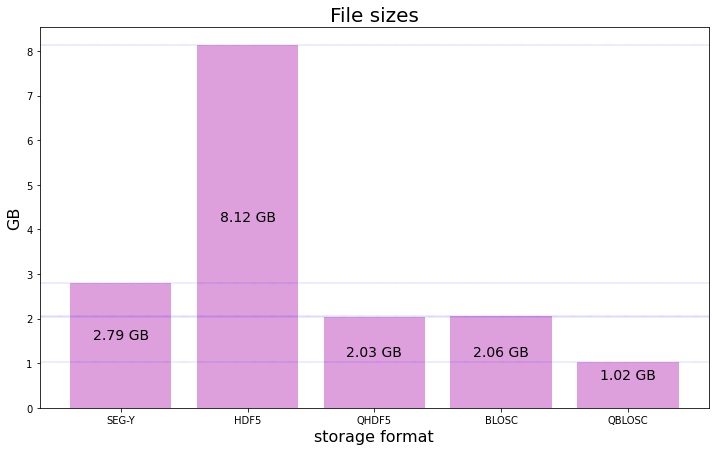

In [10]:
plot_chart(sizes, unit='GB', title='File sizes')

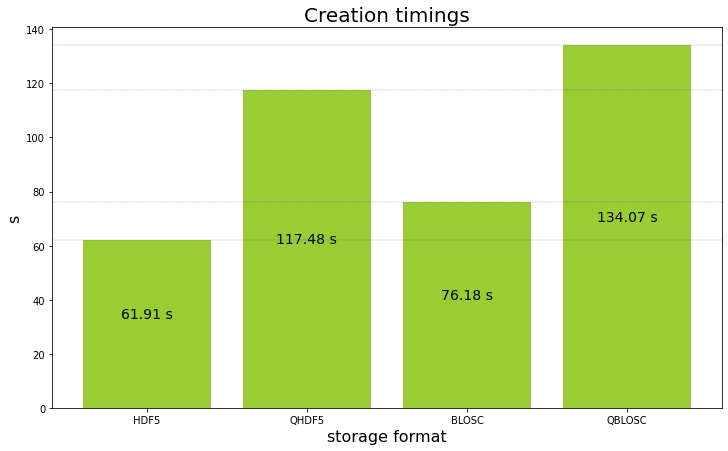

In [11]:
plot_chart(timings, unit='s', title='Creation timings')

# Assert data is the same

In [12]:
geometries = [geometry_sgy, geometry_hdf5, geometry_blosc]

In [13]:
slide_params = [{'loc': 10, 'axis': 0},
                {'loc': 10, 'axis': 1},
                {'loc': 10, 'axis': 2}]

for i, slide_params_ in enumerate(slide_params):
    slides = [g.load_slide(**slide_params_) for g in geometries]
    
    flags = [np.allclose(slide, slides[0]) for slide in slides]
    print(i, flags[1:])

0 [True, True]
1 [True, True]
2 [True, True]


In [14]:
crop_locations = [(slice(100, 110), slice(100, 150), slice(100, 200)),
                  (slice(100, 200), slice(100, 110), slice(100, 150)),
                  (slice(100, 150), slice(100, 200), slice(100, 110)),]

for i, location in enumerate(crop_locations):
    crops = [g.load_crop(location) for g in geometries]
    
    flags = [np.allclose(crop, crops[0]) for crop in crops]
    print(i, flags)

0 [True, True, True]
1 [True, True, True]
2 [True, True, True]


# Load data timings

In [15]:
geometries = [geometry_sgy,
              geometry_hdf5, geometry_hdf5_q,
              geometry_blosc, geometry_blosc_q]

In [16]:
N = 300
timings = {}

for geometry, name in zip(geometries, names):

    start = perf_counter()
    for _ in range(N):
        axis = np.random.randint(3)
        loc = np.random.randint(geometry_sgy.cube_shape[axis])
        slide = geometry.load_slide(loc, axis)

    timings[name] = 1000 * (perf_counter() - start) / N
    print(f'{name:>10}: {timings[name]:>7.3f} ms')

     SEG-Y:  19.176 ms
      HDF5:   1.361 ms
     QHDF5:   0.431 ms
     BLOSC:   2.824 ms
    QBLOSC:   1.219 ms


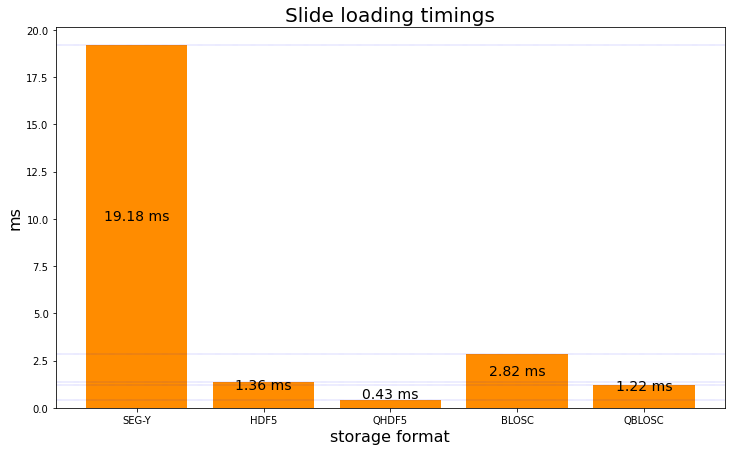

In [17]:
plot_chart(timings, unit='ms', title='Slide loading timings')

In [18]:
N = 300
timings = {}

for geometry, name in zip(geometries, names):

    start = perf_counter()
    for _ in range(N):
        point = np.random.randint(geometry_sgy.cube_shape) // 2
        shape = np.random.randint((5, 5, 5), (200, 200, 200))
        locations = [slice(start_, start_+shape_)
                     for start_, shape_ in zip(point, shape)]
        crop = geometry.load_crop(locations)

    timings[name] = 1000 * (perf_counter() - start) / N
    print(f'{name:>10}: {timings[name]:>7.3f} ms')

     SEG-Y: 217.433 ms
      HDF5:  54.149 ms
     QHDF5:  16.776 ms
     BLOSC: 123.694 ms
    QBLOSC:  63.061 ms


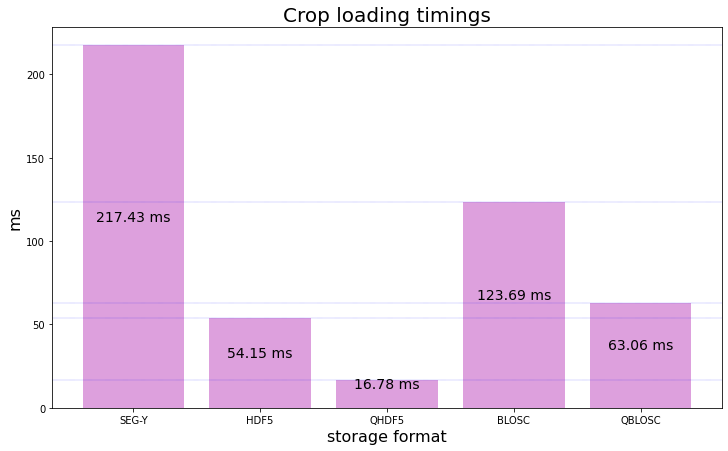

In [19]:
plot_chart(timings, unit='ms', title='Crop loading timings')